In [ ]:
# Libraries

from time import time

import pydot
import pydotplus

import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras.utils import plot_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, LSTM, Conv1D, MaxPooling1D
from keras.datasets import imdb
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import pydot as keras_pydot
from keras.preprocessing.text import Tokenizer

In [ ]:
debut = time()


max_features = 20000 
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train_load, y_train), (x_test_load, y_test) = imdb.load_data(num_words=max_features)

fin = time()

print("Executive time = ", fin - debut)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
Executive time =  14.742923498153687


In [ ]:
debut = time()
print(x_train_load.shape, 'train sequences')
print(x_test_load.shape, 'test sequences')
print(x_train_load[0])

print('Pad sequences (samples x time)')
# Pad sequence prend les 80 derniers terme car truncating est initialisé à pre idem pour padding
# Rappel argument padding et truncating 'pro' et 'pre'

x_train = sequence.pad_sequences(x_train_load, maxlen=maxlen, padding = 'pre', truncating = 'pre')
x_test = sequence.pad_sequences(x_test_load, maxlen=maxlen,padding = 'pre', truncating = 'pre')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train[0,:])

fin = time()

print("Executive time = ", fin - debut)

(25000,) train sequences
(25000,) test sequences
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

In [ ]:
# Test with Embedding (transform integer number into a vector of size embedding_size with double)

debut = time()

embedding_size = 128
batch_size = 32
epochs = 1


model_1 = Sequential()

model_1.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_1.add(Flatten())
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

fin = time()

print("Executive time = ", fin - debut)

25000/25000 [==============================] - 1s 50us/step
loss :  0.3460506318950653
acc :  0.8469600081443787


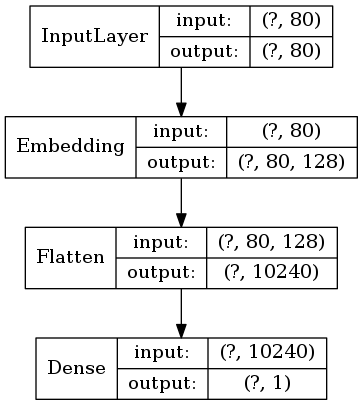

In [ ]:
loss, acc = model_1.evaluate(x_test,y_test)
print('loss : ', loss)
print('acc : ', acc)

keras_pydot = pydot
plot_model(model_1, to_file='Testmodel/model_1.png',show_shapes = True,show_layer_names=False)

In [ ]:
# Test without embedding (worst results ever)

debut = time()


batch_size = 32
epochs = 1


model_2 = Sequential()

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

fin = time()

print("Executive time = ", fin - debut)

25000/25000 [==============================] - 1s 26us/step
loss :  11.140338388061524
acc :  0.5024799704551697


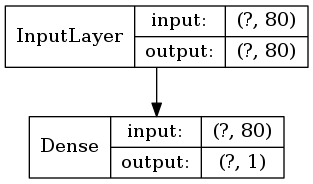

In [ ]:
loss, acc = model_2.evaluate(x_test,y_test)
print('loss : ', loss)
print('acc : ', acc)


keras_pydot = pydot
plot_model(model_2, to_file='Testmodel/model_2.png',show_shapes = True,show_layer_names=False)

In [ ]:
# Impact of the Embeding

debut = time()

embedding_size_max = 300
step_embedding = 10
embedding_size = 10

batch_size = 32
epochs = 1

Loss_list, Acc_list, Time_list = [],[],[]

while embedding_size <= embedding_size_max:
    debut_cycle = time()

    print('Embedding_size : ', embedding_size)
    model_emb = Sequential()

    model_emb.add(Embedding(max_features, embedding_size, input_length=maxlen))
    model_emb.add(Flatten())
    model_emb.add(Dense(1, activation='sigmoid'))

    model_emb.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    model_emb.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))
    
    embedding_size += step_embedding
    loss , acc = model_emb.evaluate(x_test,y_test)
    Loss_list.append(loss)
    Acc_list.append(acc)
    fin_cycle = time()

    Time_list.append(fin_cycle - debut_cycle)

fin = time()

print("Executive time = ", fin - debut)

Embedding_size :  10
/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1s 41us/step
Embedding_size :  20
/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1s 37us/step
Embedding_size :  30
/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converti

In [ ]:
print('len(Acc_list)',len(Acc_list))
print('len(Loss_list)',len(Loss_list))

Abs = [k for k in range(10,embedding_size_max+step_embedding,step_embedding)]

print(Abs)

ax1=plt.subplot(3, 1, 1)
plt.plot(Abs,Acc_list)
plt.ylabel('Acc')


ax2=plt.subplot(3,1,2) 
plt.plot(Abs,Loss_list)
plt.ylabel('Loss')


ax2=plt.subplot(3,1,3) 
plt.plot(Abs,Time_list)
plt.ylabel('Time')
plt.xlabel('embeding_size')


print('Embedding size maximazing the acc',Abs[Acc_list.index(max(Acc_list))])
print('Embedding size minimizing the loss',Abs[Loss_list.index(min(Loss_list))])
print('Embedding size minimizing the time',Abs[Time_list.index(min(Time_list))])


In [ ]:
# Test with GlobalAveragePooling1D

debut = time()

embedding_size = 128
batch_size = 32
epochs = 1


model_3 = Sequential()

model_3.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_3.add(GlobalAveragePooling1D())
model_3.add(Dense(1, activation='sigmoid'))


model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

fin = time()

print("Executive time = ", fin - debut)

In [ ]:
loss, acc = model_3.evaluate(x_test,y_test)
print('loss : ', loss)
print('acc : ', acc)


keras_pydot = pydot
plot_model(model_3, to_file='Testmodel/model_3.png',show_shapes = True,show_layer_names=False)

In [ ]:
# Test with GlobalMaxPooling1D

debut = time()

embedding_size = 128
batch_size = 32
epochs = 1


model_4 = Sequential()

model_4.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_4.add(GlobalMaxPooling1D())
model_4.add(Dense(1, activation='sigmoid'))


model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

fin = time()

print("Executive time = ", fin - debut)

25000/25000 [==============================] - 1s 43us/step
loss :  0.4012582311820984
acc :  0.8262799978256226


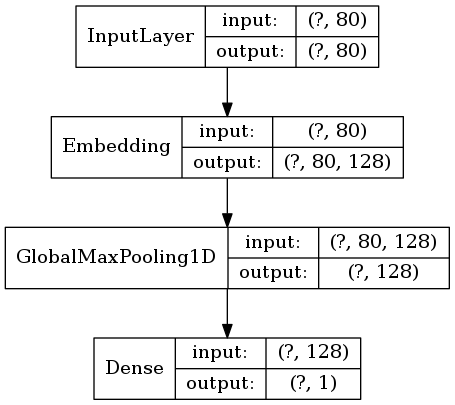

In [ ]:
loss, acc = model_4.evaluate(x_test,y_test)
print('loss : ', loss)
print('acc : ', acc)


keras_pydot = pydot
plot_model(model_4, to_file='Testmodel/model_4.png',show_shapes = True,show_layer_names=False)

In [ ]:
# Test GlobalAveragePooling1D with different embeddingsize

debut = time()

embedding_size_list = [90,110,128]
batch_size = 32
epochs = 1

Acc_list_emb, Loss_list_emb, Time_list_emb = [],[],[]

for embedding_size in embedding_size_list:
    debut_cycle = time()
    model_emb = Sequential()

    model_emb.add(Embedding(max_features, embedding_size, input_length=maxlen))
    model_emb.add(GlobalAveragePooling1D())
    model_emb.add(Dense(1, activation='sigmoid'))


    model_emb.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    model_emb.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))
    
    fin_cycle=time()
    loss, acc = model_emb.evaluate(x_test,y_test)
    Loss_list_emb.append(loss)
    Acc_list_emb.append(acc)
    Time_list_emb.append(fin_cycle-debut_cycle)

print('Embedding size : ',embedding_size_list)
print('loss : ', Loss_list_emb)
print('acc : ', Acc_list_emb)
print('Time : ', Time_list_emb)



fin = time()

print("Executive time = ", fin - debut)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1s 51us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1s 55us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1s 45us/step
Embedding size :  [90, 110, 128]
loss :  [0.40121505952835085, 0.39295987765312196, 0.38579115480422976]
acc :  [0.8266800045967102, 0.8318399786949158, 0.8321599960327148]
Time :  [20.05328059196472, 28.17852520942688, 34.483765840530396]
Executive time =  86.48722577095032


In [ ]:
# Test with MaxPooling1D

debut = time()

embedding_size = 128
batch_size = 32
epochs = 1

pool_size_list = [2,4,5,8,10,16]

Acc_list_max, Loss_list_max, Time_list_max = [],[],[]

for pool_size in pool_size_list :

    print('Pool size : ', pool_size)

    debut_cycle = time()
    
    model_5 = Sequential()

    model_5.add(Embedding(max_features, embedding_size, input_length=maxlen))
    model_5.add(MaxPooling1D(pool_size=pool_size))
    model_5.add(Flatten())
    model_5.add(Dense(1, activation='sigmoid'))


    model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    model_5.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))
    
    
    fin_cycle=time()
    loss, acc = model_5.evaluate(x_test,y_test)
    Loss_list_max.append(loss)
    Acc_list_max.append(acc)
    Time_list_max.append(fin_cycle-debut_cycle)

fin = time()

print("Executive time = ", fin - debut)

Pool size :  [2, 4, 5, 8, 10, 16]
loss :  [0.33809956405639646, 0.3408110756492615, 0.3384125780677795, 0.35612272159576414, 0.3570204218864441, 0.371209829788208]
acc :  [0.8522400259971619, 0.8525599837303162, 0.8518800139427185, 0.843559980392456, 0.8432400226593018, 0.8387600183486938]
Time :  [23.48346757888794, 28.210145473480225, 25.472538948059082, 24.297191619873047, 25.124635457992554, 24.824354648590088]


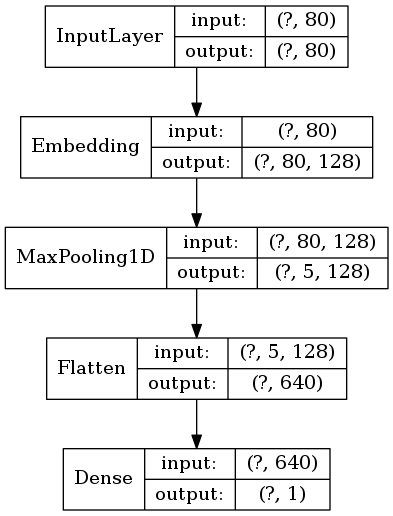

In [ ]:
print('Pool size : ',pool_size_list)
print('loss : ', Loss_list_max)
print('acc : ', Acc_list_max)
print('Time : ', Time_list_max)


keras_pydot = pydot
plot_model(model_5, to_file='Testmodel/model_5.png',show_shapes = True,show_layer_names=False)

In [ ]:
# Test with 2 layer

debut = time()

embedding_size = 128
batch_size = 32
epochs = 1





model_6 = Sequential()

model_6.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_6.add(MaxPooling1D(pool_size=4))
model_6.add(Flatten())
model_6.add(Dense(50,activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))


model_6.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model_6.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test))

fin = time()

print("Executive time = ", fin - debut)

In [ ]:
loss, acc = model_6.evaluate(x_test,y_test)

print('loss : ', loss)
print('acc : ', acc)



keras_pydot = pydot
plot_model(model_6, to_file='Testmodel/model_6.png',show_shapes = True,show_layer_names=False)

In [ ]:
# Test relevance of truncating equal to 'pre' and 'post'

debut = time()
print(x_train_load.shape, 'train sequences')
print(x_test_load.shape, 'test sequences')
print(x_train_load[0])

print('Pad sequences (samples x time)')
# Pad sequence prend les 80 derniers terme car truncating est initialisé à pre idem pour padding
# Rappel argument padding et truncating 'pro' et 'pre'

x_train_post = sequence.pad_sequences(x_train_load, maxlen=maxlen, padding = 'post', truncating = 'post')
x_test_post = sequence.pad_sequences(x_test_load, maxlen=maxlen,padding = 'post', truncating = 'post')

x_train_pre = sequence.pad_sequences(x_train_load, maxlen=maxlen, padding = 'pre', truncating = 'pre')
x_test_pre = sequence.pad_sequences(x_train_load, maxlen=maxlen, padding = 'pre', truncating = 'pre')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train_post[0,:])
print(x_train_pre[0,:])

embedding_size = 128
batch_size = 32
epochs = 1





model_prepost = Sequential()

model_prepost.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_prepost.add(MaxPooling1D(pool_size=4))
model_prepost.add(Flatten())
model_prepost.add(Dense(50,activation='relu'))
model_prepost.add(Dense(1, activation='sigmoid'))


model_prepost.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model_prepost.fit(x_train_post, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_post, y_test))

losspost , accpost = model_prepost.evaluate(x_test_post, y_test)
print('Loss post :', losspost)
print('Acc post :', accpost)

model_prepost.fit(x_train_pre, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_pre, y_test))

losspre , accpre = model_prepost.evaluate(x_test_pre, y_test)
print('Loss pre :', losspre)
print('Acc pre :', accpre)


fin = time()



print("Executive time = ", fin - debut)

In [ ]:
# A code to use Tokenizer to convert a string into a succesion of integer according to the uterrance of each words in
# the training data to use them in our algorithm

train_data  = ["The woman is the best thing I know",
"I wonder if the queen Elizabeth ",
"I saw a donkey yesterday in my garden. I looked at him, he looked at me",
"I love myself"]

x_test_data = ["This movie is a shame. I wonder if Ryan Gosling is actually really trying to play his role or if he just come to receive the money at the end of the production" ]


t = Tokenizer(num_words = 10)
t.fit_on_texts(train_data)


trainx = t.texts_to_sequences(train_data)
testx = t.texts_to_sequences(test_data)
print(t.word_index)
print(trainx)
print(testx)


t = Tokenizer(num_words = 10)
t.fit_on_texts(test_data)

trainx = t.texts_to_matrix(train_data, mode='count')
testx = t.texts_to_matrix(test_data, mode='count')
print(t.word_index)

In [ ]:
wordindex = imdb.get_word_index() 
print(wordindex['fawn'])

In [ ]:
phrases = ["This movie is a shame. I wonder if Ryan Gosling is actually really trying to play his role or if he just come to receive the money at the end of the production. I recommend nobody to watch this movie" ,
"Director Francis Lawrence stages the action sequences... with a modicum of flair, and Julianne Moore as rebel leader Coin gives off some sparks, but for the most part there is nothing divertingly new or different about this franchise fade-out.",
"Wonderful movie !",
"A shame",
"Explosive"]

label = [1,0,1,1,1]
Decoup_phrase = []
for phrase in phrases :
    Decoup_phrase.append(phrase.split())

Convert=[]
for decoup in Decoup_phrase:
    convet_phrase =[]
    for mot in decoup:
        if mot in wordindex:
            convert_phrase.append(wordindex[mot])
    Convert.append(convert_phrase)
    


print(Convert)

phrase_test=sequence.pad_sequences(Convert, maxlen=maxlen, padding = 'pre', truncating = 'pre')

print(phrase_test)

losspre , accpre = model_prepost.evaluate(phrase_test, label)
print('Loss pre :', losspre)
print('Acc pre :', accpre)



In [ ]:
# Print the difference between pre and post

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 1

# Model 1 is the simpliest model possible with one layer

model_1 = Sequential()

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Model 2 is a model that proves the efficiency of words embedding

model_2 = Sequential()

model_2.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Model 3

model_3 = Sequential()

model_3.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_3.add(MaxPooling1D(pool_size=pool_size))
model_3.add(Flatten())
model_3.add(Dense(50,activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))


model_3.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])


# Model final

model_final = Sequential()
model_final.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_final.add(Dropout(0.25))
model_final.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model_final.add(MaxPooling1D(pool_size=pool_size))
model_final.add(LSTM(lstm_output_size))
model_final.add(Dense(1))
model_final.add(Activation('sigmoid'))

model_final.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
x_train_post = sequence.pad_sequences(x_train_load, maxlen=maxlen, padding = 'post', truncating = 'post')
x_test_post = sequence.pad_sequences(x_test_load, maxlen=maxlen,padding = 'post', truncating = 'post')

x_train_pre = sequence.pad_sequences(x_train_load, maxlen=maxlen, padding = 'pre', truncating = 'pre')
x_test_pre = sequence.pad_sequences(x_test_load, maxlen=maxlen, padding = 'pre', truncating = 'pre')

# Training of the model

ACC_post = []
ACC_pre = []

## Model 1

model_1.fit(x_train_post, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_post, y_test))

losspost, accpost = model_1.evaluate(x_test_post, y_test)
ACC_post.append(accpost)

model_1.fit(x_train_pre, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_pre, y_test))


losspre , accpre = model_1.evaluate(x_test_pre, y_test)
ACC_pre.append(accpre)


## Model 2

model_2.fit(x_train_post, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_post, y_test))

losspost, accpost = model_2.evaluate(x_test_post, y_test)
ACC_post.append(accpost)

model_2.fit(x_train_pre, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_pre, y_test))


losspre , accpre = model_2.evaluate(x_test_pre, y_test)
ACC_pre.append(accpre)

## Model 3

model_3.fit(x_train_post, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_post, y_test))

losspost, accpost = model_3.evaluate(x_test_post, y_test)
ACC_post.append(accpost)

model_3.fit(x_train_pre, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_pre, y_test))


losspre , accpre = model_3.evaluate(x_test_pre, y_test)
ACC_pre.append(accpre)

## Model final

model_final.fit(x_train_post, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_post, y_test))

losspost, accpost = model_final.evaluate(x_test_post, y_test)
ACC_post.append(accpost)

model_final.fit(x_train_pre, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test_pre, y_test))


losspre , accpre = model_final.evaluate(x_test_pre, y_test)
ACC_pre.append(accpre)


Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1s 45us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1s 48us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 4s 140us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 4s 170us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 5s 183us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 6s 233us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 26s 1ms/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 24s 966us/step


[0.4997600018978119, 0.8107200264930725, 0.8098800182342529, 0.8162800073623657]
[0.4941999912261963, 0.8409600257873535, 0.8423600196838379, 0.85343998670578]


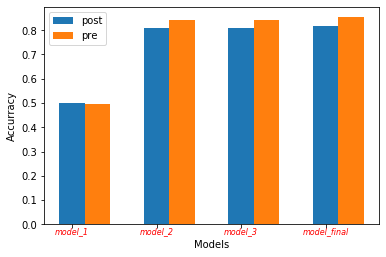

In [ ]:
bins = [x + 0.5 for x in range(0, len(ACC_post))]

print(ACC_post)
print(ACC_pre)

width =0.3
plt.bar(np.arange(len(ACC_post)), ACC_post, width=width)
plt.bar(np.arange(len(ACC_pre))+ width, ACC_pre, width=width)

plt.legend(['post','pre'])

axes = plt.gca()
axes.set_xlabel('Models')
axes.xaxis.set_ticks(range(4))
label_Model = ['model_1','model_2','model_3','model_final'] 
axes.xaxis.set_ticklabels(label_Model, rotation = 0, color = 'red', fontsize = 8, style = 'italic', verticalalignment = 'center')

axes.set_ylabel('Accurracy')
plt.savefig('Testmodel/PostPreComparison')
plt.show()


